In [84]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [91]:
#train_images.shape

# build a 2 dense layers MLP


from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# the last layer will return an array of 10 probability scores
network.add(layers.Dense(10,activation='softmax'))

"""
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
# loss function, optimizer and metrics to monitor during training and testing
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

"""



'\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\n\nmodel = keras.Sequential([\n    layers.Dense(512, activation="relu"),\n    layers.Dense(10, activation="softmax")\n])\n# loss function, optimizer and metrics to monitor during training and testing\nmodel.compile(optimizer=\'rmsprop\',\n              loss=\'sparse_categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\n'

In [92]:
# preprocess the data
# prepare the image data

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

# prepare the labels
#from keras.utils import to_categorical

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)



In [93]:
# train the network
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 1.9452 - accuracy: 0.5800
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 1.1213 - accuracy: 0.7878
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.7121 - accuracy: 0.8384
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5561 - accuracy: 0.8606
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4801 - accuracy: 0.8736


In [88]:
# make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 69ms/step


array([5.8812923e-08, 5.0357754e-09, 4.8878654e-05, 7.3579751e-05,
       2.3033853e-11, 1.0663034e-08, 6.6934982e-12, 9.9987471e-01,
       8.8259199e-08, 2.6836615e-06], dtype=float32)

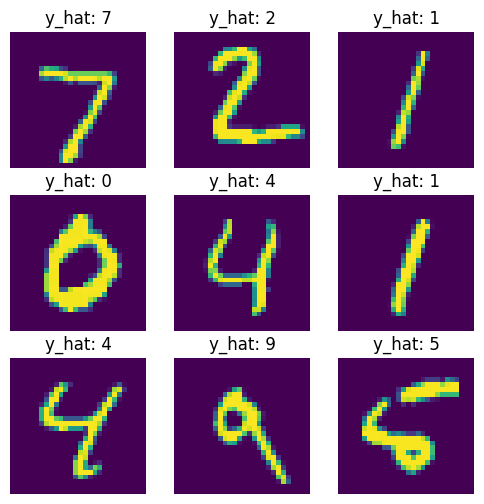

In [69]:
#data visualization
from matplotlib import pyplot as plt

data = test_digits
images = data.reshape(data.shape[0], 28, 28)

plt.figure(figsize=(6,6))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(images[i])
    plt.title('y_hat: {}'.format(predictions[i].argmax()))
    plt.savefig('MLP classifier')
    

In [80]:
# reshape the data back from 3-D to 2-D
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255
test_images.shape
test_labels.shape

(10000,)

In [89]:
# evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.9799
test_acc: 0.9799000024795532
